# Project description

We have received data on game sales, user and expert ratings, genres and platforms of these games. We need to identify patterns that determine how successful the games are. This will allow us to choose a potentially popular product and plan advertising campaigns.<br>For this project, we will need to determine the most successful platforms, popular genres, as well as the relationship between game sales and their ratings. We need to determine whether the ratings of users and critics affect sales in the whole world and in certain regions. Then check if user ratings of Xbox One and PC platforms are the same, and also whether user ratings of the Action and Sports genres differ.

## Processing data from a file

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
os.chdir('C:\\Users\\Владислав\\Documents\\Проекты\\datasets')

In [3]:
data = pd.read_csv('games.csv')

In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data.duplicated().sum()

0

In [9]:
data[data.duplicated(subset=['name','platform'])].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
data = data.drop_duplicates(subset=['name','platform'])

In [13]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [14]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
data['rating'] = data['rating'].fillna('WR')

In [18]:
data.isna().sum()

name                  1
platform              0
year_of_release     268
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating                0
dtype: int64

We have decided not to fill in the missing data for the following columns: name, year_of_release, genre, critic_score and user_score as we don't have enough information to base our estimations for the missing data.

We are going to replace 'tbd'(to be discussed) with nan.

In [20]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [21]:
data['user_score'] = data['user_score'].astype('float64')

In [24]:
data.isna().sum()

name                  1
platform              0
year_of_release     268
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating                0
dtype: int64

In [25]:
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Research analysis

### Analysis of annual sales across different platforms 

Text(0, 0.5, 'Количество игр')

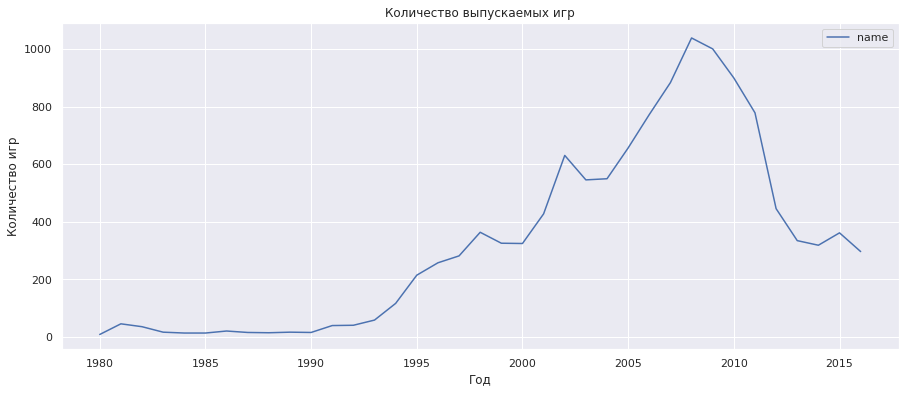

In [26]:
#total annual sales
sns.set()
data.pivot_table(index='year_of_release', values = 'name', aggfunc = 'nunique').plot(figsize=[15, 6])
plt.title('Количество выпускаемых игр')
plt.xlabel('Год')
plt.ylabel('Количество игр')

Text(0, 0.5, 'Продажи, млн копий')

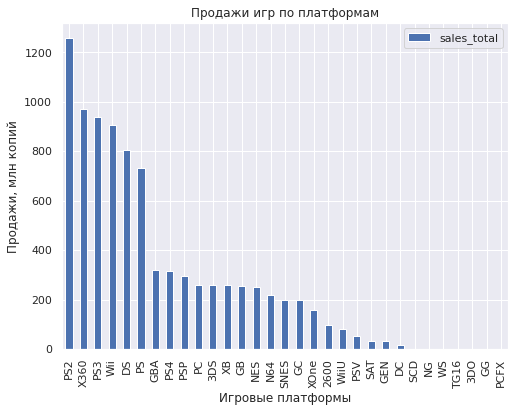

In [27]:
#sales for different platforms
data.pivot_table(index='platform', values = 'sales_total', aggfunc = 'sum')\
.sort_values(by='sales_total', ascending = False)\
.plot(kind='bar', figsize=(8, 6))
    
plt.title('Продажи игр по платформам')
plt.xlabel('Игровые платформы')
plt.ylabel('Продажи, млн копий')

Top-10 platfroms based on total sales: PS2, X360, DS, PS3, Wii, GBA, PSP, PS4, PC, 3DS. 

### Determining platrorms' lifecycles 

In [28]:
data_pl = data.pivot_table(index='platform', values = 'year_of_release', aggfunc = ['min', 'max'])\
.sort_values(by=('min','year_of_release'))

data_pl['cicle'] = data_pl[('max','year_of_release')] - data_pl[('min','year_of_release')]

display(data_pl)

,min,max,cicle
,year_of_release,year_of_release,
platform,,,
2600,1980,1989,9
NES,1983,1994,11
DS,1985,2013,28
PC,1985,2016,31
GB,1988,2001,13
SNES,1990,1999,9
GEN,1990,1994,4
GG,1992,1992,0


In [29]:
data_pl['cicle'].mean()

7.612903225806452

On average new gaming platforms emerge every 1-3 years. An average lifecycle of a platform is 7 years.

### Further analysis

From now on I propose to study only the latest data to predict future income, that is, sales since 2012. I would suggest not to take into consideration data from earlier periods, since there was a very large peak in sales, which went down from 2008 and stabilized somewhere around 2012.

In [30]:
data_recent = data.query('year_of_release >=  2012')

Text(0, 0.5, 'Продажи, млн копий')

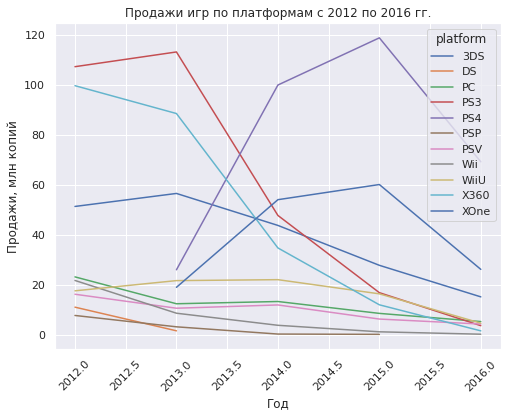

In [31]:
data_recent.groupby(['platform', 'year_of_release'])['sales_total'].sum().unstack('platform').plot(figsize=(8,6))

plt.xticks(rotation=45)
plt.title('Продажи игр по платформам с 2012 по 2016 гг.')
plt.xlabel('Год')
plt.ylabel('Продажи, млн копий')

Given that the data for 2016 may not be complete, we will look at the data for 2015 to identify potentially profitable platforms. As you can see on the graph, sales are growing for the PS4 and XOne platforms, they are the market leaders. But the 3DS platform has seen a steady decline. A sharp decline in sales since 2013 has been observed for the X360 and PS3 platforms, which is most likely due to the release of updated versions of these platforms to the market.

In [32]:
data_recent_grouped = data_recent.pivot_table(index=['platform', 'year_of_release'], values = 'sales_total', aggfunc = 'sum')

In [33]:
data_recent_grouped = data_recent_grouped.reset_index()

[Text(0.5, 1.0, 'Продажи игр по платформам')]

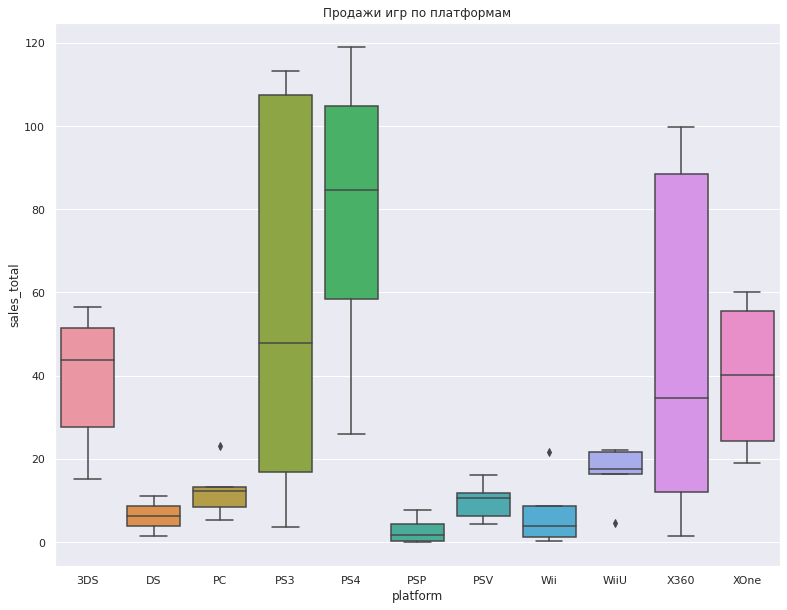

In [34]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform', y='sales_total', data=data_recent_grouped).set(title='Продажи игр по платформам')

It can be concluded that the average sales of the PS4 platform are the highest in the last period, the median value is 85 million copies, the top 5 also includes: PS3, 3DS, XOne, X360.

### Assessment of the impact of user and critic ratings on sales

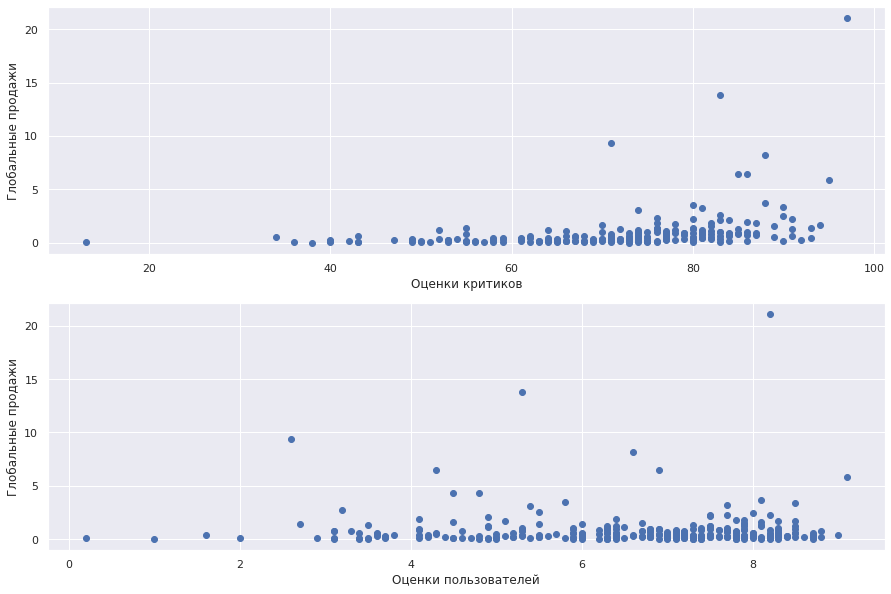

In [35]:
#creating a sales scatter diagram for the PS3 platform and ratings
sales_ps3 =  data_recent.query('platform == "PS3"')

fig, ax = plt.subplots(2, figsize=(15, 10))

ax[0].scatter(x = sales_ps3['critic_score'], y = sales_ps3['sales_total'])
ax[0].set_xlabel("Оценки критиков")
ax[0].set_ylabel("Глобальные продажи")

ax[1].scatter(x = sales_ps3['user_score'], y = sales_ps3['sales_total'])
ax[1].set_xlabel("Оценки пользователей")
ax[1].set_ylabel("Глобальные продажи")

plt.show()

In [36]:
#let's determine the correlation coefficient between PS3 platform sales and critics' ratings
print(sales_ps3['sales_total'].corr(sales_ps3['critic_score']))

0.33415175755098564


In [37]:
#let's determine the correlation coefficient between PS3 platform sales and users' ratings
print(sales_ps3['sales_total'].corr(sales_ps3['user_score']))

-0.006205767686051499


 Given the very low correlation coefficients between critic and user ratings and actual total sales, we can say that there is no connection at all. Most likely, popular games still have high ratings, but not all games that are noted by users and critics have high sales, which is confirmed by the scatter charts. <br> If we look at the leading games by sales on the graph, we see that they still have a high rating, but the rest of the sales are scattered about the same, most games get a critical rating above 60. When we cross the border into a rating of 80, we see that sales are higher in general, but with user ratings it is still less obvious, we observe the greatest concentration of points after crossing the rating of 6 points, however, it cannot be said that sales are much higher if the game has a rating above 8 points.

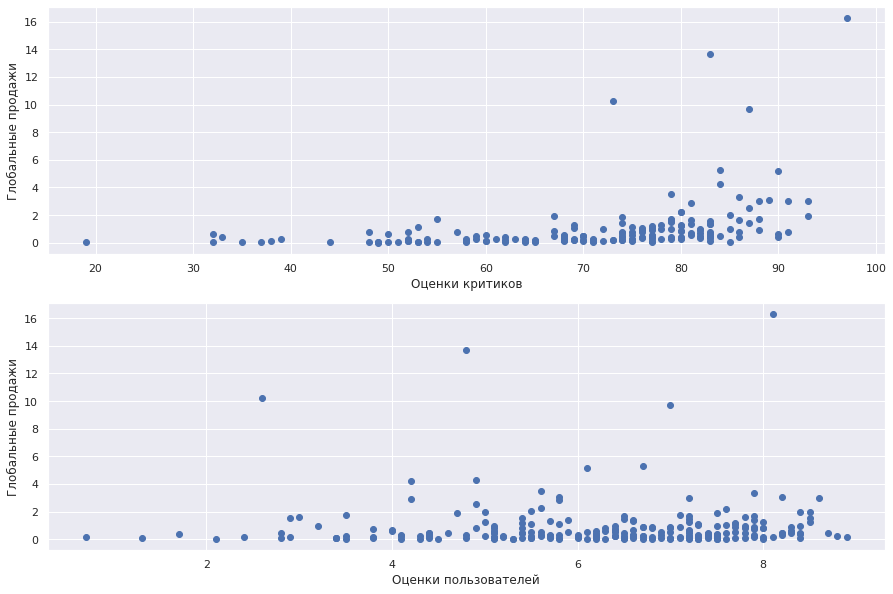

In [38]:
#creating a sales scatter diagram for the X360 platform and ratings
sales_x360 =  data_recent.query('platform == "X360"')

fig, ax = plt.subplots(2, figsize=(15, 10))

ax[0].scatter(x = sales_x360['critic_score'], y = sales_x360['sales_total'])
ax[0].set_xlabel("Оценки критиков")
ax[0].set_ylabel("Глобальные продажи")

ax[1].scatter(x = sales_x360['user_score'], y = sales_x360['sales_total'])
ax[1].set_xlabel("Оценки пользователей")
ax[1].set_ylabel("Глобальные продажи")

plt.show()

In [39]:
#let's determine the correlation coefficient between X360 platform sales and critics' ratings
print(sales_x360['sales_total'].corr(sales_x360['critic_score']))

0.36057348885073387


In [40]:
#let's determine the correlation coefficient between X360 platform sales and users' ratings
print(sales_x360['sales_total'].corr(sales_x360['user_score']))

0.006163978646213357


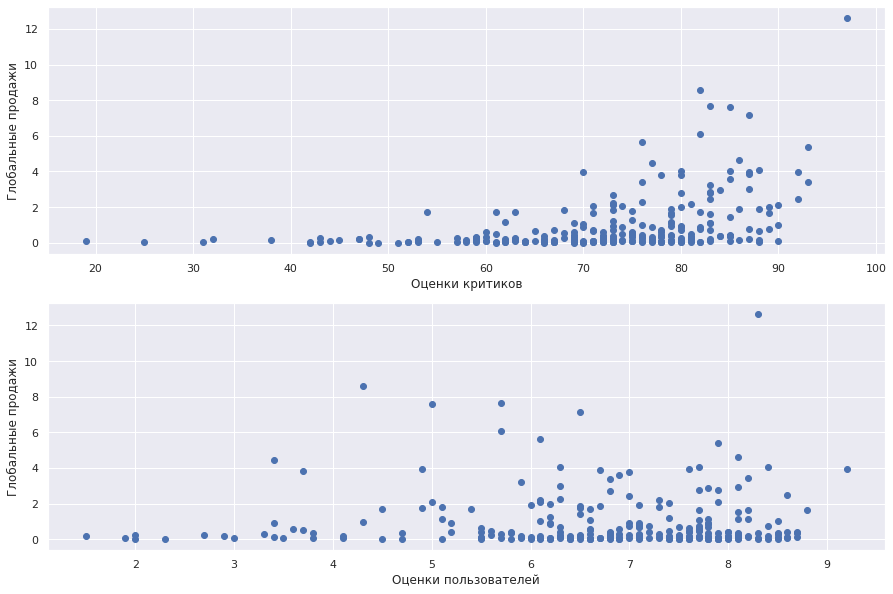

In [41]:
#creating a sales scatter diagram for the PS4 platform and ratings
sales_ps4 =  data_recent.query('platform == "PS4"')

fig, ax = plt.subplots(2, figsize=(15, 10))

ax[0].scatter(x = sales_ps4['critic_score'], y = sales_ps4['sales_total'])
ax[0].set_xlabel("Оценки критиков")
ax[0].set_ylabel("Глобальные продажи")

ax[1].scatter(x = sales_ps4['user_score'], y = sales_ps4['sales_total'])
ax[1].set_xlabel("Оценки пользователей")
ax[1].set_ylabel("Глобальные продажи")

plt.show()

In [42]:
#let's determine the correlation coefficient between PS4 platform sales and critics' ratings
print(sales_ps4['sales_total'].corr(sales_ps4['critic_score']))

0.4065679020617816


In [43]:
#let's determine the correlation coefficient between PS4 platform sales and users' ratings
print(sales_ps4['sales_total'].corr(sales_ps4['user_score']))

-0.031957110204556424


The situation is similar when we consider sales of other platforms. There is no strong correlation as such. Correlation analysis across other platforms confirms that there is only a weak correlation between sales and critic ratings. The scatterplot also shows that it is more predictable with critics' ratings than with users' ratings. The top selling games have high critics' scores (over 70-80 points).

### Analyzing the most popular and profitable genres

In [44]:
data_recent.pivot_table(index='genre', values = 'sales_total', aggfunc = ['sum','count','mean'])\
.sort_values(by=('mean','sales_total'), ascending = False)

,sum,count,mean
,sales_total,sales_total,sales_total
genre,,,
Shooter,304.73,235,1.296723
Platform,61.00,85,0.717647
Sports,181.06,267,0.678127
Role-Playing,192.80,370,0.521081
Racing,53.42,114,0.468596
Misc,85.04,192,0.442917
Simulation,35.12,80,0.439000
Action,441.12,1031,0.427856


If we consider total sales, the most popular are the following genres: action, shooter, role-playing. The least popular are games in the following genres: adventure, strategy, puzzle. However, if we consider sales per game released, then the leaders are shooter, platform, sports.

Text(0, 0.5, 'Продажи, млн копий')

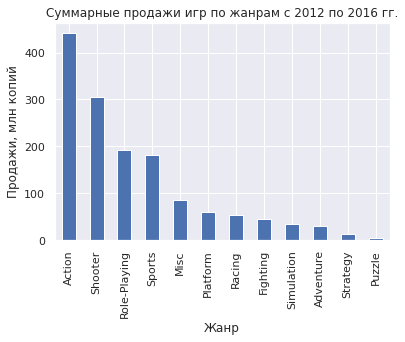

In [45]:
#sales by genre
data_recent.groupby(['genre'])['sales_total'].sum().sort_values(ascending = False).plot(kind='bar')
plt.title('Суммарные продажи игр по жанрам с 2012 по 2016 гг.')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн копий')

## Analyzing sales by regions

### Total sales by regions

In [46]:
data_recent.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc = sum)

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,37.70,0.00,19.12
PS3,106.85,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


Top-5 best-sellers for EU region: PS4, PS3, X360, XOne, 3DS. Top-5 best-sellers for JP region: 3DS, PS3, PSV, PS4, WiiU. Top-5 best-sellers for NA region: X360, PS4, PS3, XOne, 3DS. <br>The distribution of sales by platforms in North America and Europe is almost identical, with the only difference that the sales leader in America is X360 platform, its sales in America are almost twice as high as sales in Europe. But the Japanese market differs to a much greater extent. Here, the top-5 also includes PS3 and PS4 platforms, but the market share is much lower. The top seller in Japan is 3DS. The top-5 best-sellers also include platforms WiiUb, PSV, which are not in the top 5 in other regions.

### Analyzing the most popular genres

In [47]:
data_recent.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc = sum)

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Adventure,9.46,8.24,8.92
Fighting,10.79,9.44,19.79
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Puzzle,1.40,2.14,1.13
Racing,27.23,2.50,17.22
Role-Playing,48.53,65.44,64.00
Shooter,113.47,9.23,144.77


Top 5 genres in the EU region: action, shooter, sports, role-playing, racing. Top 5 genres in the JP region: role-playing, action, misc, simulation, fighting. Top 5 for NA region: action, shooter, sports, role-playing, misc.<br> Action, role-playing genres are popular in all regions. The leading genres in NA and Europe regions are identical, except that racing is more popular in Europe whereas misc is more popular in America. However, the portrait of the most popular genres in Japan differs dramatically, here the top includes simulations and fighting genres.

### ESBR and sales in different regions

To analyze the impact of the ESBR rating on sales, we will take general data, and not “relevant” in order to be able to analyze all categories, since not all categories have been presented over the past couple of years.

In [49]:
data_recent.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc = sum)

,eu_sales,jp_sales,na_sales
rating,,,
E,113.02,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.90,26.02,66.02
WR,91.50,108.84,103.31


E, M, WR rated games have the highest sales in all regions. At the same time, in Japan, games without a rating are the leader in sales.

## Hypotheses testing

### Hypothesis 1: The user ratings of the Xbox One and PC platforms are the same

H0: Xbox One and PC user ratings are equal. H1: Xbox One and PC platform user ratings are not equal.

In [50]:
data_pc = data_recent.query('platform == "PC"')
data_xone = data_recent.query('platform == "XOne"')

In [51]:
data_pc = data_pc[data_pc['user_score'].notna()]
data_xone = data_xone[data_xone['user_score'].notna()]

In [52]:
alpha = 0.05
results = st.ttest_ind(
    data_pc['user_score'], 
    data_xone['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5065901030514672
Не получилось отвергнуть нулевую гипотезу


<b>Conclusion 1:</b>we accept the null hypothesis. The user ratings of the Xbox One and PC platform are equal.

### Hypothesis 2: users' ratings for action and sports genres are different

H0: users' ratings in the action genre are equal to those in the sports genre. H1: Action user ratings are not equal to sports ratings.

In [53]:
data_a = data_recent.query('genre == "Action"')
data_sp = data_recent.query('genre == "Sports"')

In [54]:
data_a = data_a[data_a['user_score'].notna()]
data_sp = data_sp[data_sp['user_score'].notna()]

In [55]:
alpha = 0.05
results = st.ttest_ind(
    data_a['user_score'], 
    data_sp['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 5.98945806646755e-20
Отвергаем нулевую гипотезу


<b>Conclusion 2:</b>we reject the null hypothesis. User ratings in the action and sports genres are different.

## Conclusions

In our analysis, we identified the leading platforms, analyzed the number of games being released and defined the life cycle of different platforms. We checked whether there is a connection between sales and reviews from critics and users. Identified the most popular genres. Then we looked at the preferences of players in different regions: Europe, Japan, North America.

The peak in the number of released games was in 2005-2010, after 2008 the number of released games has been on the decline. The most popular platforms from 1980 to 2016 are: PS2, X360, DS, PS3, Wii. On average, a new gaming platform appears every 1 - 3 years, and the average platform life cycle is about 7 years.

If we take the current period, namely sales since 2012, then the PS4 and XOne platforms are gaining popularity, when their predecessors PS3, X360 have been losing positions since 2013, which is directly related to the release of the updated versions.

Determining the relationship between sales and ratings from critics and users, we came to the conclusion that there is no direct strong relationship, however, it is worth emphasizing that most bestsellers have high critical ratings, but fans are not so unanimous in their ratings.

The most popular genres(according to total sales) are action, shooter, role-playing games, and the least popular are adventure, puzzle, strategy games. But the most profitable genres can be considered shooter, platform, sports. This tells us that gamers prefer more fast-paced games.

Considering the preferences of players by region (North America, Europe, Japan), one feature of the Japanese market can be noticed - this is the preference for portable consoles (PSV, WiiU, 3DS). The American and European markets as a whole differ little in their preferences both in genres and in platforms, here preference is given to games in the genre of action, shooter, sports. But the Japanese market gives preference to games in the genres of role-playing, action, misc, simulation. E-rated, M-rated games, and unrated games in general sell best. At the same time, games without a rating are mostly popular in Japan.

Testing the hypotheses, we came to the conclusions that user ratings for the PC and Xone platforms do not differ. On the other hand, the ratings for the action and sports genres differ.

In general, based on the analyzed data, we can say that the most profitable games will be of the PS4 and XOne platforms in the shooter, role-playing, sports, platform genres with E, M ratings, as well as no rating at all.
